# HW 2 - DSP Applications



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.fft import fft, fftfreq

%matplotlib inline

## Part 0: Comprehensive Demonstration of Required Tasks with Self-designed Signals

A complex signal comprising four basic sine waves of different frequencies, amplitudes, and phases is set as the original signal, on which all of the required filters and operators are applied. Specifically, the demonstrations include the following parts:

- filtered signals with lowpass, highpass, and bandpass filters, compared to the original signal;
- frequency responses of the above filters;
- convoluted signals with a rectangular window, and a moving average filter, compared to the original signal;
- magnitude plot of the fast fourier transformed signal;
- phase plot of the fast fourier transformed signal.

**Notice:**
The baseline parameters are defined in this part, including:
- fundamental frequency - $1000 Hz$ (*different from $10 Hz$ as required*)
- total time - $0.05s$ (*different from $2s$ as required*)
- sampling frequency - $5000 Hz$ (*Nyquist frequency at $2500 Hz$*)
- total samples - $250$

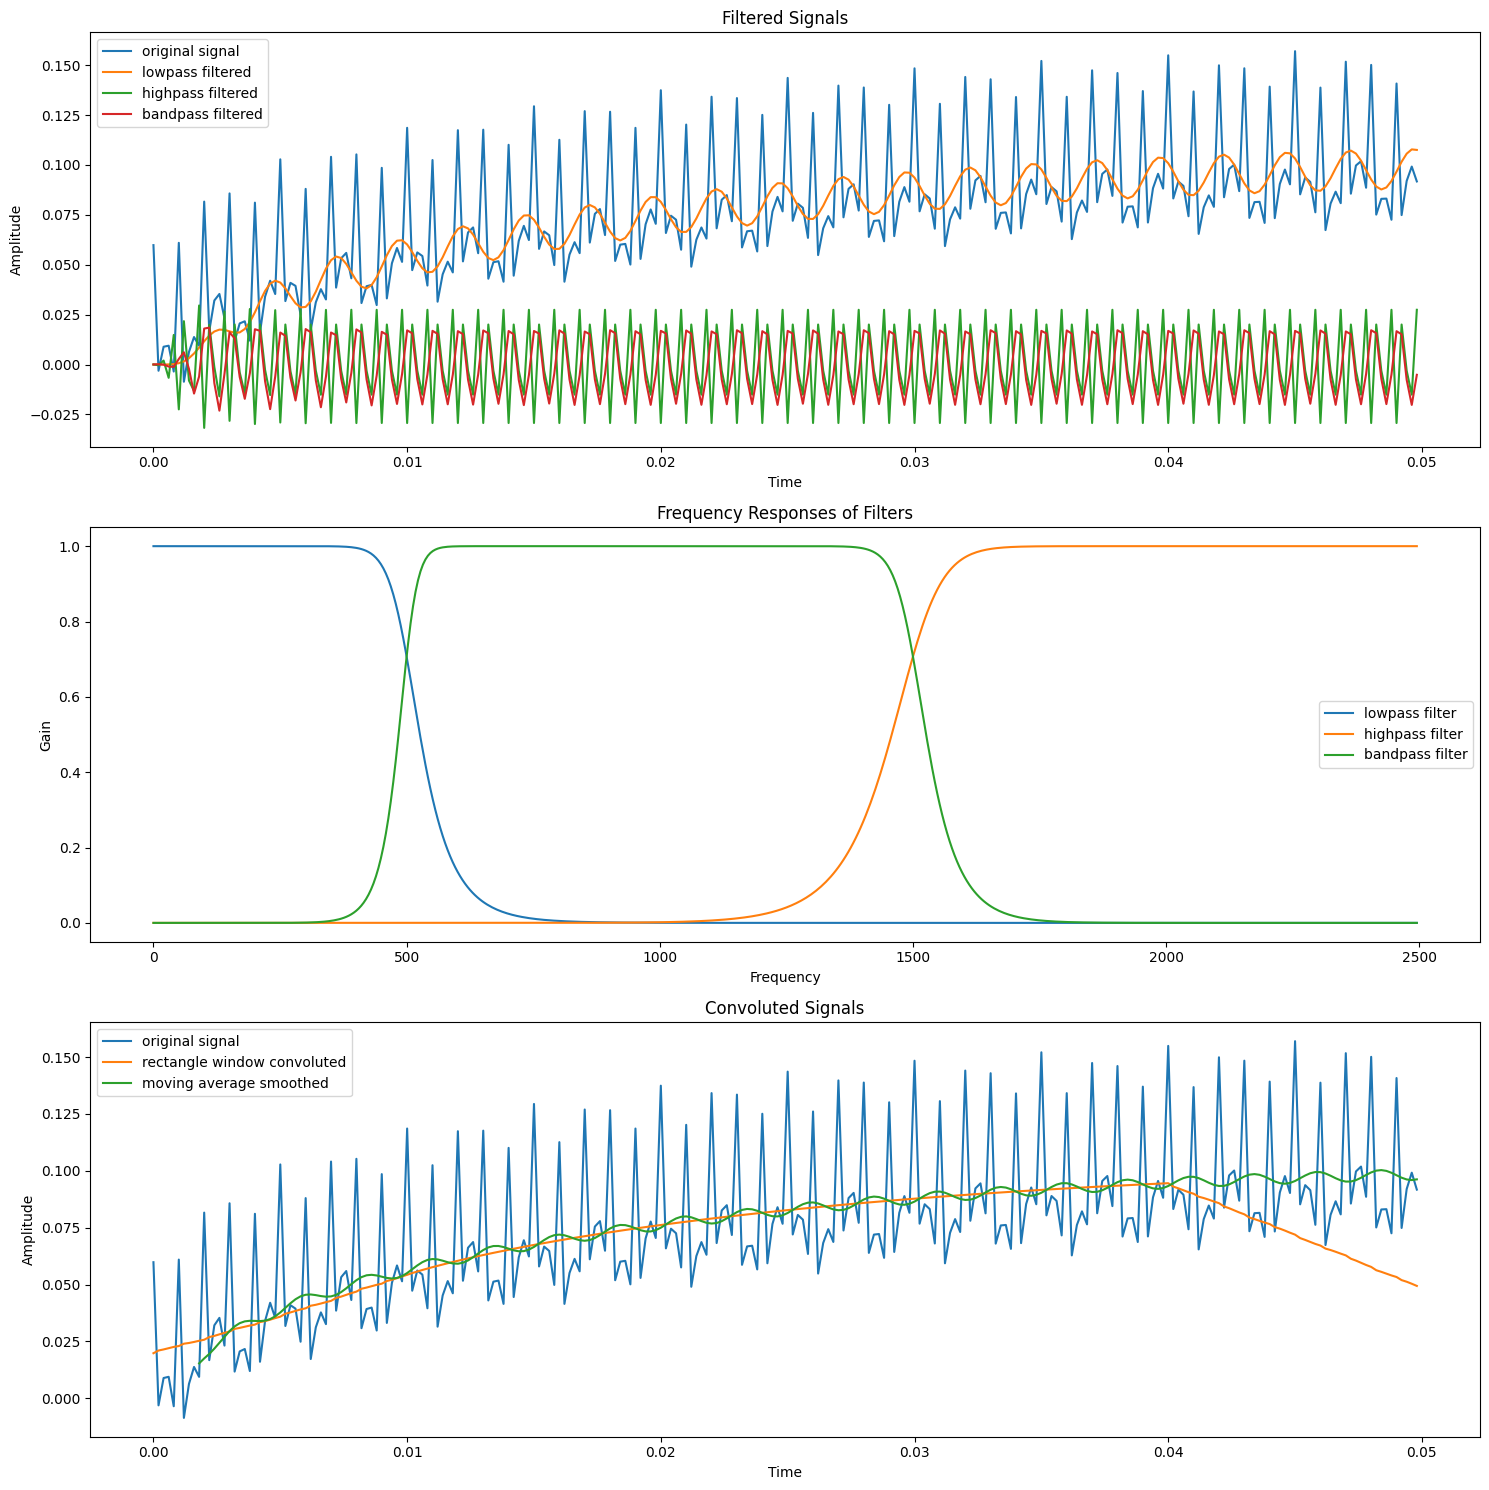

In [4]:
plt.figure(figsize=(15, 15))
plt.subplot(3, 1, 1)

f = 1000  # fundamental freq
T = 0.05  # total time
fs = 5000  # sampling freq
sp = fs * T  # total samples
nyq = fs / 2  # nyquist freq
t = np.linspace(0, T, int(sp), False)  # time stamps

x = 0.1 * np.sin(2 * np.pi * 1 * np.sqrt(t))
x += 0.01 * np.cos(2 * np.pi * 400 * t + 0.1)
x += 0.02 * np.cos(2 * np.pi * f * t + .11)
x += 0.03 * np.cos(2 * np.pi * 2000 * t)
plt.plot(t, x, label='original signal')

low = 500  # low cut-off freq
high = 1500  # high cut-off freq

w_low = low / nyq  # critical freq of lowpass, normalized
b_low, a_low = sig.butter(10, w_low, btype='lowpass')
x_low = sig.lfilter(b_low, a_low, x)  # lowpass filtered signal
plt.plot(t, x_low, label='lowpass filtered')

w_high = high / nyq  # critical freq of highpass, normalized
b_high, a_high = sig.butter(10, w_high, btype='highpass')
x_high = sig.lfilter(b_high, a_high, x)  # highpass filtered signal
plt.plot(t, x_high, label='highpass filtered')

w_band = [low / nyq, high / nyq]  # critical freq of bandpass, normalized
b_band, a_band = sig.butter(10, w_band, btype='band')
x_band = sig.lfilter(b_band, a_band, x)  # bandpass filtered signal
plt.plot(t, x_band, label='bandpass filtered')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Filtered Signals')
plt.legend(loc='best')

plt.subplot(3, 1, 2)
m_low, h_low = sig.freqz(b_low, a_low)
plt.plot((fs / 2 / np.pi) * m_low, abs(h_low), label='lowpass filter')
m_high, h_high = sig.freqz(b_high, a_high)
plt.plot((fs / 2 / np.pi) * m_high, abs(h_high), label='highpass filter')
m_band, h_band = sig.freqz(b_band, a_band)
plt.plot((fs / 2 / np.pi) * m_band, abs(h_band), label='bandpass filter')

plt.xlabel('Frequency')
plt.ylabel('Gain')
plt.title('Frequency Responses of Filters')
plt.legend(loc='best')

plt.subplot(3, 1, 3)
plt.plot(t, x, label='original signal')

ws = 100  # window size
ks = 10  # kernel size

x_conv = sig.fftconvolve(x, np.ones(ws) / ws, 'same')
plt.plot(t, x_conv, label='rectangle window convoluted')
x_avg = sig.fftconvolve(x, np.ones(ks) / ks, 'valid')
x_avg = np.concatenate((np.full(ks - 1, np.nan), x_avg))
plt.plot(t, x_avg, label='moving average smoothed')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Convoluted Signals')
plt.legend(loc='best')
plt.tight_layout()

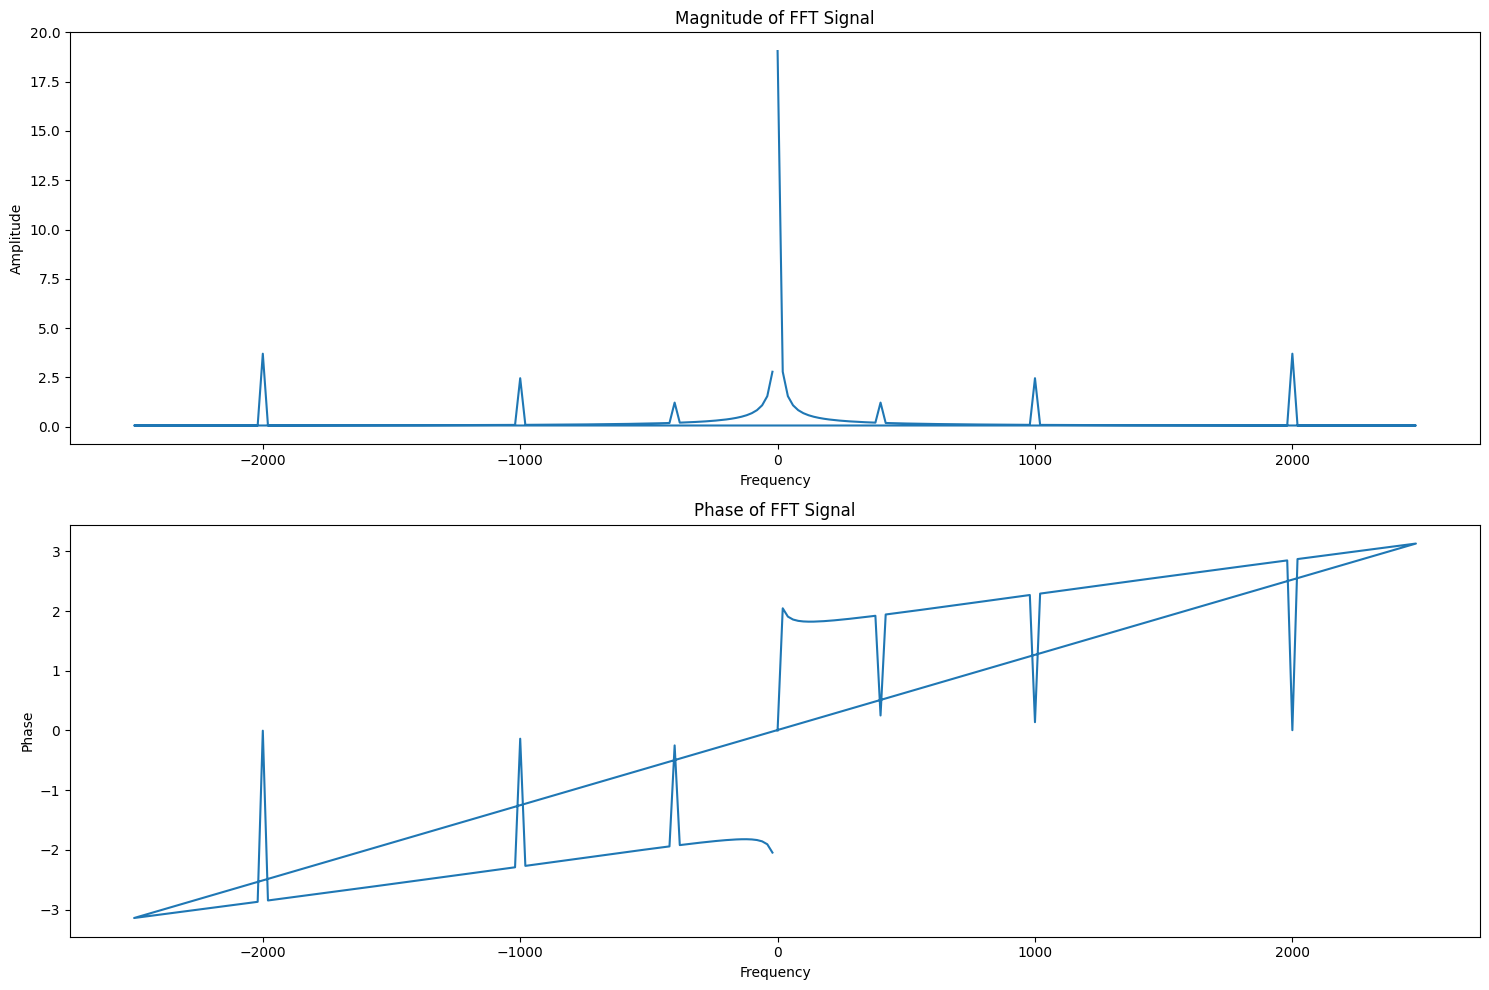

In [348]:
x_fft = fft(x)  # FFT spectrum
fr = fftfreq(len(x_fft), 1 / fs)  # frequency range
mag = np.abs(x_fft)  # magnitude of FFT signal
phase = np.angle(x_fft)  # phase of FFT signal

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(fr, mag)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Magnitude of FFT Signal')

plt.subplot(2, 1, 2)
plt.plot(fr, phase)
plt.xlabel('Frequency')
plt.ylabel('Phase')
plt.title('Phase of FFT Signal')

plt.tight_layout()

## Part 1: Basic DSP Applications in Python
### Task 1. Create a Python script that generates a sine wave with a frequency of 1000 Hz and a duration of 0.05 seconds. Plot the waveform using the matplotlib library.

Text(0.5, 1.0, 'Sine Wave, Fundamental @ 1000 Hz')

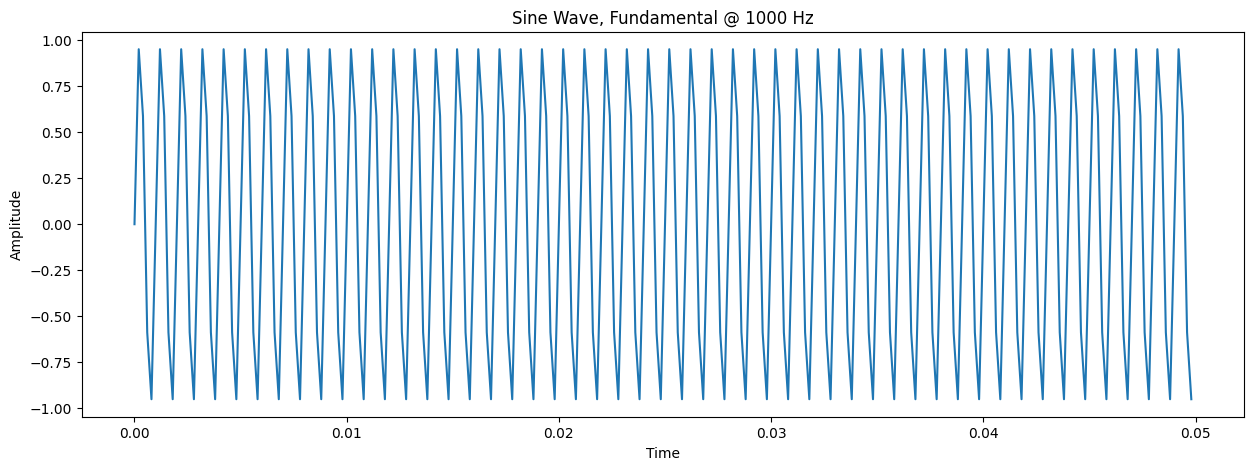

In [5]:
# Suggestion: Use the numpy function np.linspace() to generate the time samples, and np.sin() to generate the sine wave. 
# Be sure to use a sampling frequency that follows Nyquist-Shannon Sampling Theorem
# Then use plt.plot() to plot the waveform.
# Remember to label your plot axes

y1 = np.sin(2 * np.pi * f * t)  # sine wave signal
plt.figure(figsize=(15, 5))
plt.plot(t, y1)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sine Wave, Fundamental @ 1000 Hz')

### Task 2. Create a Python script that applies a low-pass filter to the sine wave generated in task 1. The cutoff frequency of the low-pass filter should be 500 Hz. Plot the filtered waveform using the matplotlib library.



Text(0.5, 1.0, 'Lowpass Filter, Cut-off @ 500 Hz')

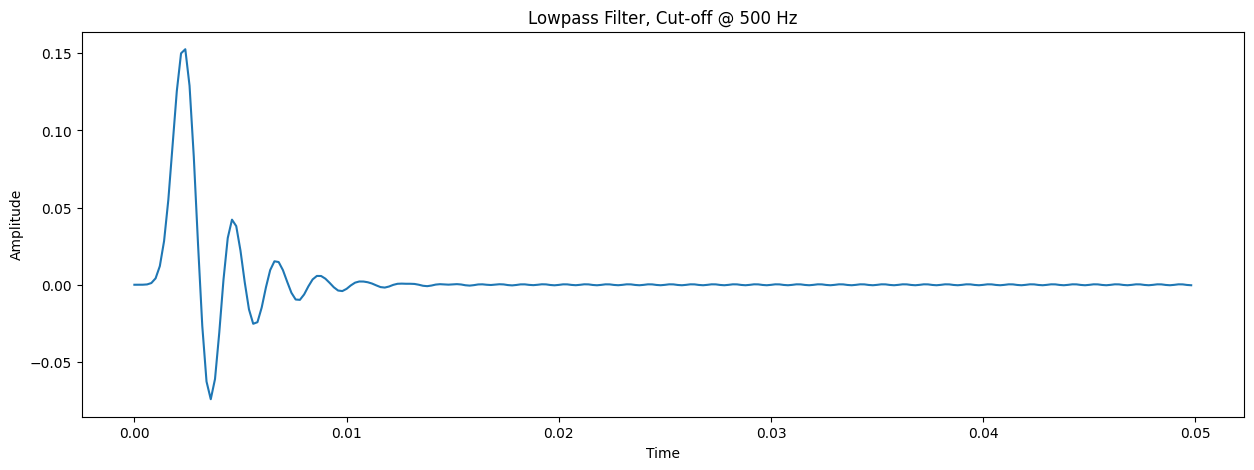

In [350]:
# Use a Buttworth filter for your lowpass filter. ex. b, a = sig.butter(Order, cutoff, btype = 'low', fs = sampleFrequency)
# Order input argument can be between 1-300 (ideally 1-10)
# Documentation for sig.butter: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
# Use sig.lfilt() to filter the sine wave. ex. y = sig.lfilt(b, a, x)
# Documentation for sig.lfilt(): https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
# Finally, use plt.plot() to plot the filtered waveform.

low = 500  # cut-off freq of filter
w2 = low / nyq  # critical freq, normalized
b2, a2 = sig.butter(10, w2, btype='lowpass')  # butterworth filter coefs
y2 = sig.lfilter(b2, a2, y1)  # lowpass filtered signal
plt.figure(figsize=(15, 5))
plt.plot(t, y2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Lowpass Filter, Cut-off @ 500 Hz')

### Task 3. Create a Python script that applies a high-pass filter to the sine wave generated in task 1. The cutoff frequency of the high-pass filter should be 500 Hz. Plot the filtered waveform using the matplotlib library.



Text(0.5, 1.0, 'Highpass Filter, Cut-off @ 500 Hz')

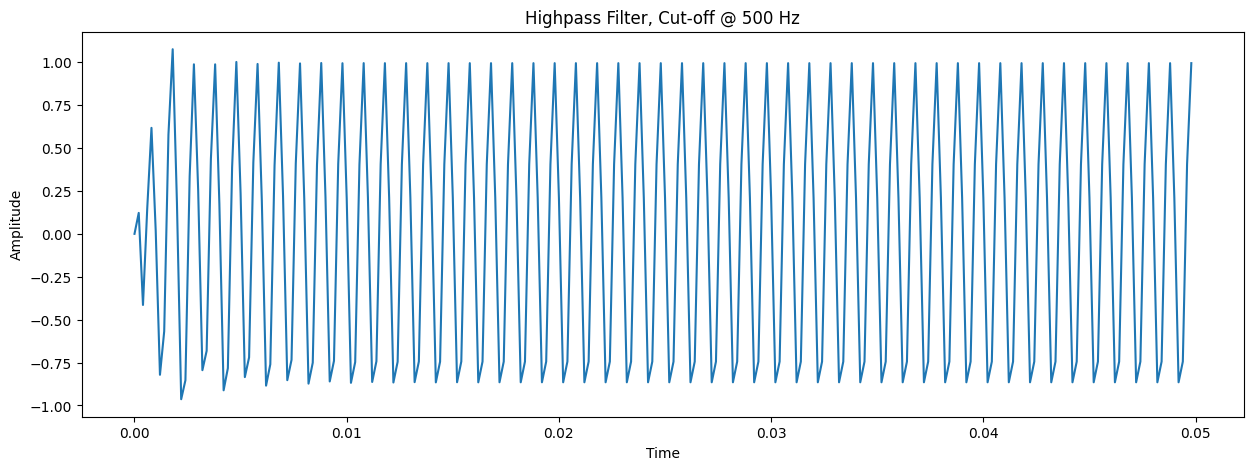

In [351]:
# Use a Buttworth filter for your highpass filter. ex. b, a = sig.butter(Order, cutoff, btype = 'highpass', fs = sampleFrequency)
# Order input argument can be between 1-300 (ideally 1-10)
# Documentation for sig.butter: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
# Use sig.lfilt() to filter the sine wave. ex. y = sig.lfilt(b, a, x)
# Documentation for sig.lfilt(): https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
# Finally, use plt.plot() to plot the filtered waveform.

high = 500  # cut-off freq of filter
w3 = high / nyq  # critical freq, normalized
b3, a3 = sig.butter(10, w3, btype='highpass')  # butterworth filter coefs
y3 = sig.lfilter(b3, a3, y1)  # highpass filtered signal
plt.figure(figsize=(15, 5))
plt.plot(t, y3)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Highpass Filter, Cut-off @ 500 Hz')

### Task 4. Create a Python script that applies a band-pass filter to the sine wave generated in task 1. The cutoff frequencies of the band-pass filter should be 400 Hz and 600 Hz. Plot the filtered waveform using the matplotlib library.

Text(0.5, 1.0, 'Bandpass Filter, Cut-off @ [400, 600 Hz]')

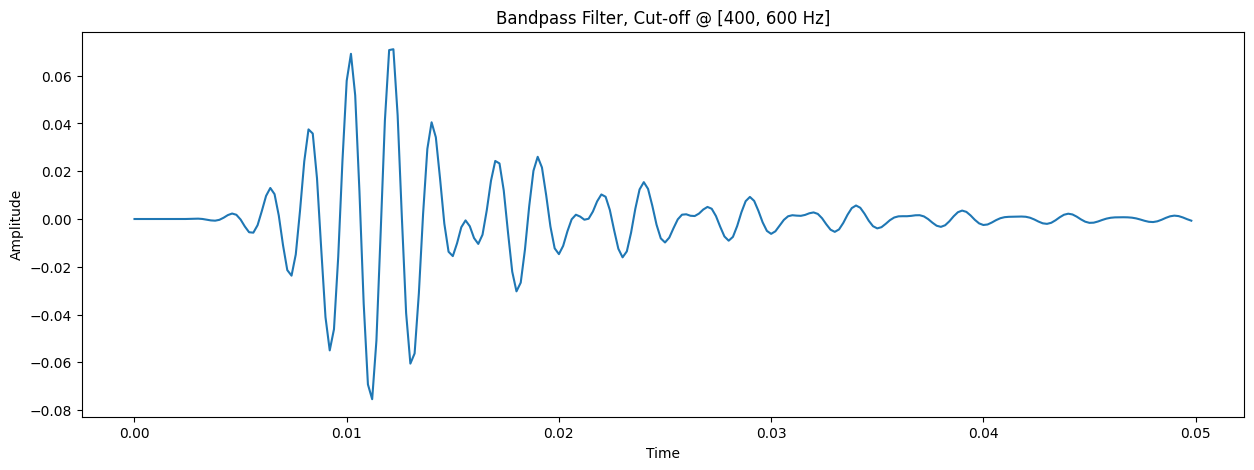

In [352]:
# Use a Buttworth filter for your highpass filter. ex. b, a = sig.butter(Order, cutoff, btype = 'highpass', fs = sampleFrequency)
# Order input argument can be between 1-300 (ideally 1-10)
# Make sure to read on how to input two critical frequencies 
# Documentation for sig.butter: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
# Use sig.lfilt() to filter the sine wave. ex. y = sig.lfilt(b, a, x)
# Documentation for sig.lfilt(): https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
# Finally, use plt.plot() to plot the filtered waveform.

f4_low = 400  # low cut-off freq
f4_high = 600  # high cut-off freq
w4 = [f4_low / nyq, f4_high / nyq]  # critical freq, normalized
b4, a4 = sig.butter(10, w4, btype='band')  # butterworth filter coefs
y4 = sig.lfilter(b4, a4, y1)  # bandpass filtered signal
plt.figure(figsize=(15, 5))
plt.plot(t, y4)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Bandpass Filter, Cut-off @ [400, 600 Hz]')

### Task 5. Create a Python script that performs convolution of the sine wave generated in task 1 with a rectangular window of length 100 samples. Plot the convolved signal using the matplotlib library.

Text(0.5, 1.0, 'Convolution with Rectangular Window')

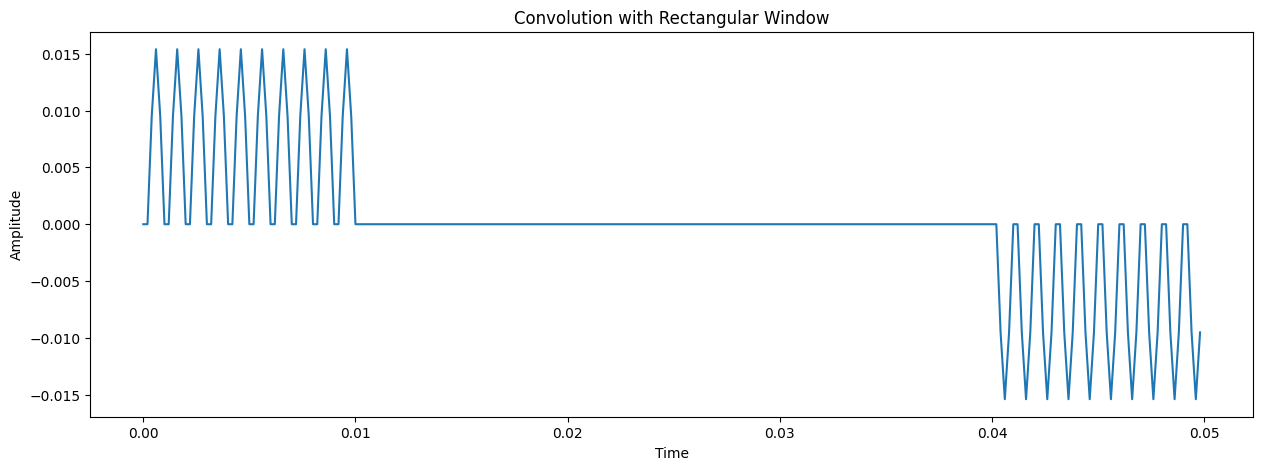

In [6]:
# Suggestion: Create a rectangular window of length 100 samples using the np.ones() function. 
# Then use the convolve() function from numpy to perform the convolution.
# Finally, use plt.plot() to plot the convolved signal.

ws = np.ones(100)  # rectangular window size
y5 = sig.fftconvolve(y1, ws / 100, 'same')  # convolution with a faster method
plt.figure(figsize=(15, 5))
plt.plot(t, y5)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Convolution with Rectangular Window')

### Task 6. Create a Python script that performs moving average of the sine wave generated in task 1 with a window of length 10 samples. Plot the filtered signal using the matplotlib library.

Text(0.5, 1.0, 'Simple Moving Average with Kernel @ 10')

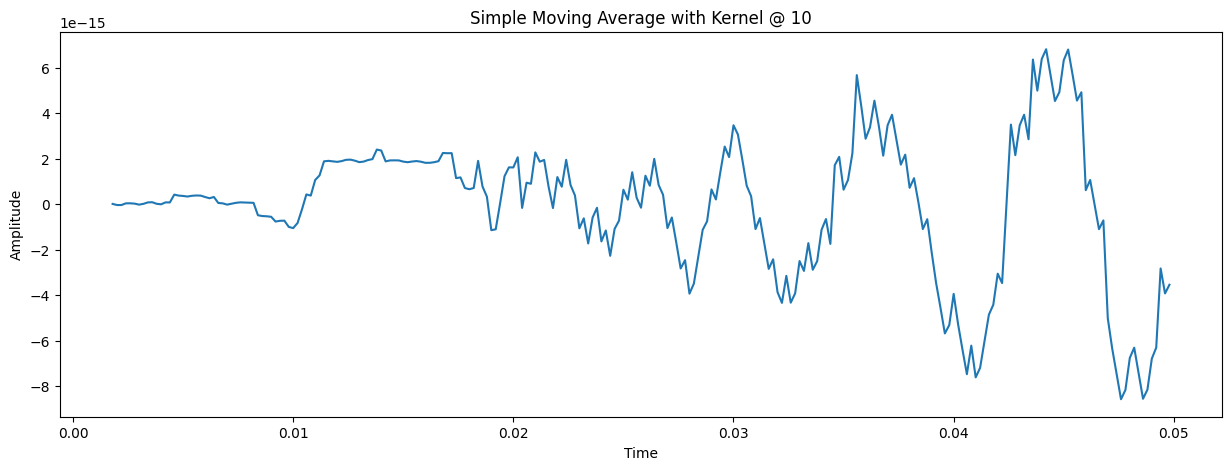

In [354]:
# Suggestion: Use the numpy function np.convolve() with mode='valid' to perform the moving average.
# Can also be accomplished with for/while loop
# Then use plt.plot() to plot the filtered signal.

ks = 10  # kernel size
y6 = sig.fftconvolve(y1, np.ones(ks) / ks, 'valid')  # simple moving average with valid convolution
y6 = np.concatenate((np.full(ks - 1, np.nan), y6))  # insert nans to beginning for equal length
plt.figure(figsize=(15, 5))
plt.plot(t, y6)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Simple Moving Average with Kernel @ 10')

### 7. Compare the filtered waveforms obtained in tasks 2, 3, 4, 5 and 6 with the original waveform generated in task 1. Write a a few paragraphs in your notebook explaining the results obtained and the implications of each filter/operation type on the signal.

The waveform plotted in Task 1 is a basic signal, a sine wave, on which multiple operations and modifications are applied in the following tasks.

Tasks 2 through 4 require designs that filter selected frequency ranges while allowing others to be heard of decoded. In task 2, a lowpass filter is applied to prevent signals from getting through above the cut-off frequency; in task 3, a highpass filter is applied to prevent signals below this frequency. In task 4, a bandpass filter is applied, to prevent signals outside of the range defined by the lower and upper critical frequencies.

Since the original signal is a sine wave with $1000 Hz$ of frequency, most of the parts would be left intact while others dampened through a highpass filter with a cut-off frequency at $500 Hz$; the opposite is expected for a lowpass filter and a bandpass filter with close cut-off frequencies. As can be seen in the plots, the hypotheses are verified. The bandpass plot needs attention as the y-axis limit is different, but the amplitudes are in fact fluctuating around 0.

Tasks 5 and 6 both require operations that convolve two signals to create a third one to express how the shape of one signal is modified by the other. Pointwise product is calculated of the two signals for transformation. In task 5, a rectangular window is applied to modify the basic signal; in task 6, another rectangular window is applied to compute the simple moving average of the basic signal. The tasks are much alike in essence as they both can be done with the `convolve` method (or `fftconvolve` as I did) with different options.

Using the `same` mode returns the convolution with output shape same as the original data, while the `valid` mode returns shorter output with convolution products of completely overlapping signals. It may not seem evident in the required plots, but more in my self-initiated plots, what applications each mode can achieve. Convolution of original data with a window or kernel is straightforward and helps us understand the characteristics of the signals better. Rolling average is also valuable as it smoothes out the data and gets rid of the noise. Sliding the window to compute the arithmetic means of multiple points to create a new signal attenuates the peaks, which represents higher frequencies. The larger the kernel, the smaller the peaks, the more dampened the high frequency signals. However, we should be careful not to distort the signal too much with the moving average filter.

## Part 2: Advanced DSP Applications in Python

### Task 1. Create a Python script that generates a signal that is a sum of two sine waves with different frequencies and amplitudes. The first sine wave should have a frequency of 1000 Hz and an amplitude of 1, the second sine wave should have a frequency of 2000 Hz and an amplitude of 0.5. Plot the waveform using the matplotlib library.

Text(0.5, 1.0, 'Complex Signals, Freqs @ 1000 Hz & 2000 Hz')

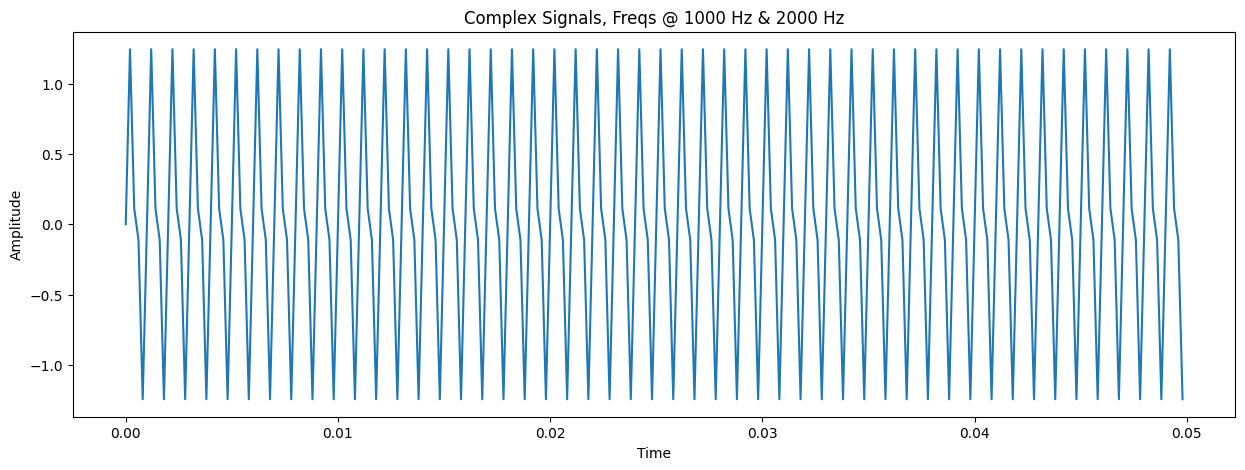

In [355]:
# Suggestions:
# - Use the numpy library's sine function to generate the sine waves
# - Use the numpy library's arange function to create an array of time values
# - Use the matplotlib library's plot function to plot the waveform

y8_1 = 1 * np.sin(2 * np.pi * f * t)  # basic signal 1
y8_2 = 0.5 * np.sin(2 * np.pi * 2 * f * t)  # basic signal 2
y8 = y8_1 + y8_2  # addition of two signals
plt.figure(figsize=(15, 5))
plt.plot(t, y8)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Complex Signals, Freqs @ 1000 Hz & 2000 Hz')

### Task 2. Create a Python script that applies a Butterworth filter to the signal generated in task 1. The cutoff frequency of the filter should be 1500 Hz and the filter order should be 4. Plot the filtered waveform using the matplotlib library.

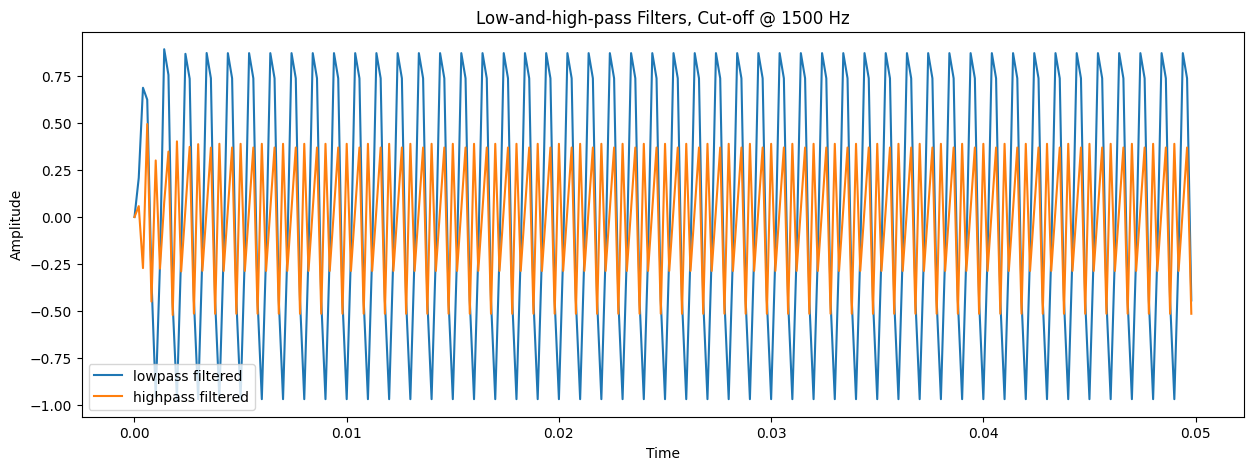

In [356]:
# Suggestions:
# - Use the scipy library's signal butter function to generate the Butterworth filter
# - Use the scipy library's lfilter function to apply the filter to the signal
# - Use the matplotlib library's plot function to plot the filtered waveform
# - Documentation for sig.butter: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
# - Documentation for sig.lfilt(): https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html

cutoff = 1500  # cut-off freq
w9 = cutoff / nyq  # critical freq
plt.figure(figsize=(15, 5))

b9_low, a9_low = sig.butter(4, w9, btype='lowpass')
y9_low = sig.lfilter(b9_low, a9_low, y8)
plt.plot(t, y9_low, label='lowpass filtered')

b9_high, a9_high = sig.butter(4, w9, btype='highpass')
y9_high = sig.lfilter(b9_high, a9_high, y8)
plt.plot(t, y9_high, label='highpass filtered')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Low-and-high-pass Filters, Cut-off @ 1500 Hz')
plt.legend(loc='best')

### Task 3. Create a Python script that computes the Fast Fourier Transform (FFT) of the signal generated in task 1. Plot the magnitude and phase of the FFT using the matplotlib library.

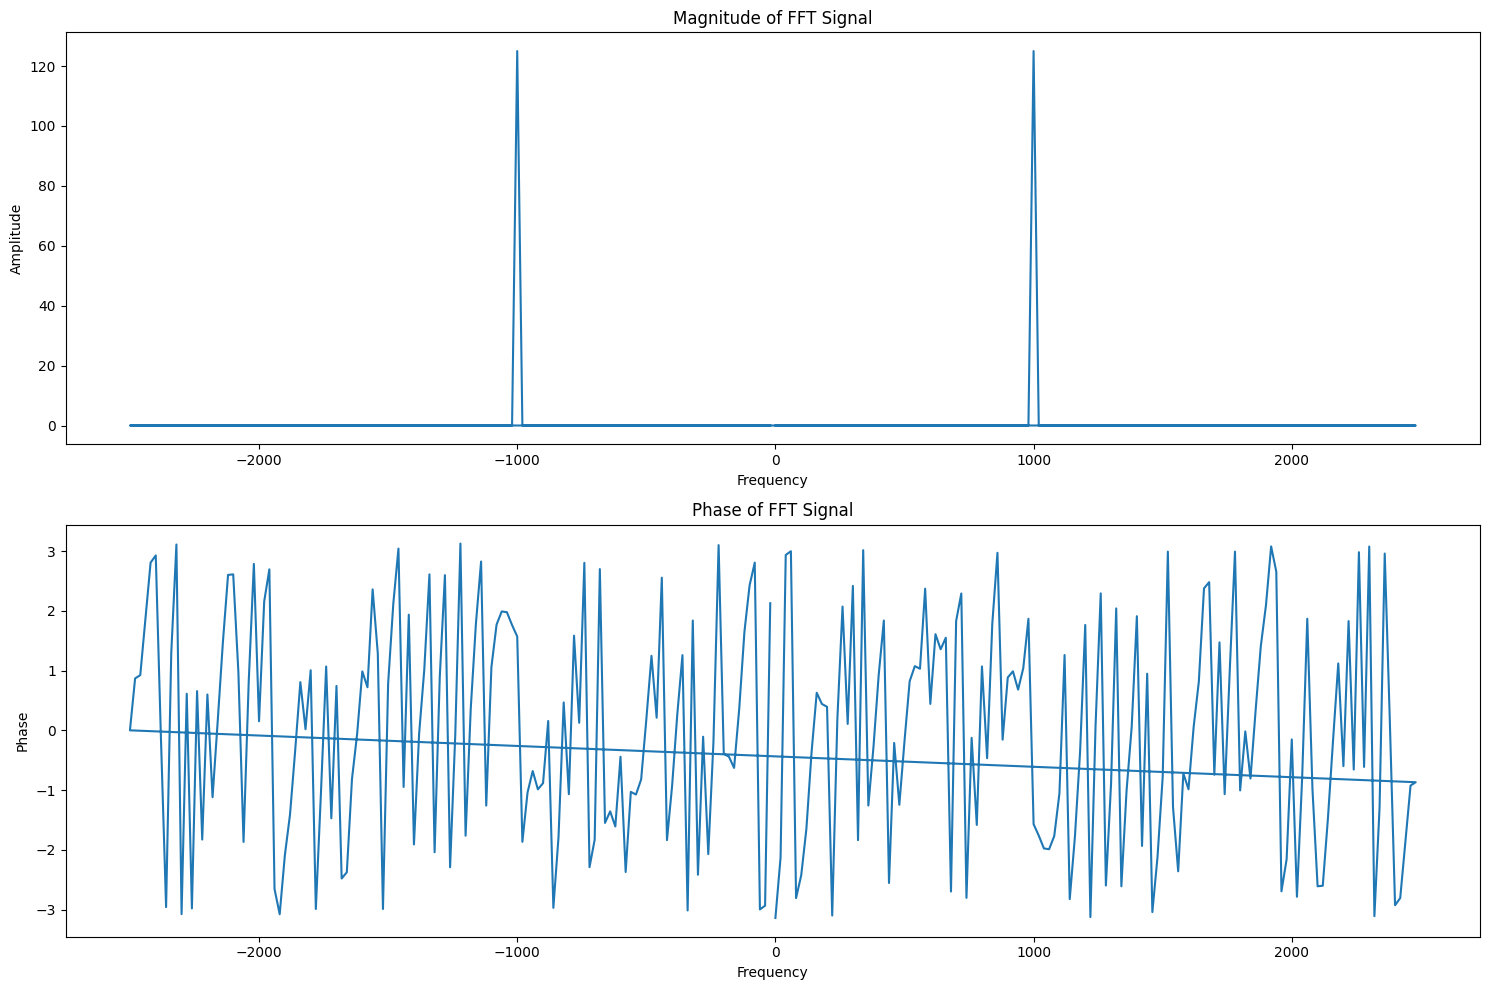

In [357]:
# Use the fft function to get the Fourier Transform of the sine wave. ex. X = fft(x)
# Documentation for fft: https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html
# To get the magnitude of the fft use np.abs(). ex. mag = np.abs(X)
# To get the phase of the fft use np.angle(). ex. phase = np.angle(X)
# Additionally, you can use fftfreq to get the independent axis for your plots. ex. freq = fftfreq(len(X), 1/fs)
# Documentation for fftfreq: https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html

y10 = fft(y1)  # FFT spectrum
f10 = fftfreq(len(y10), 1 / fs)  # frequency range
mag = np.abs(y10)  # magnitude of FFT signal
phase = np.angle(y10)  # phase of FFT signal

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(f10, mag)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Magnitude of FFT Signal')

plt.subplot(2, 1, 2)
plt.plot(f10, phase)
plt.xlabel('Frequency')
plt.ylabel('Phase')
plt.title('Phase of FFT Signal')

plt.tight_layout()